In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('drug200.csv')

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.shape

(200, 6)

In [6]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [9]:
df.describe(include='object')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,104,77,103,91


### Data Cleaning

In [10]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

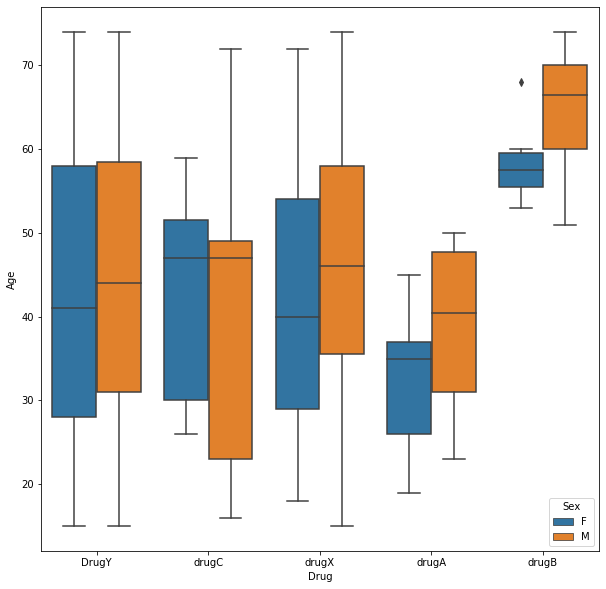

In [11]:
plt.figure(figsize=(10,10)) 
sns.boxplot(x='Drug',y='Age',hue='Sex',data=df)

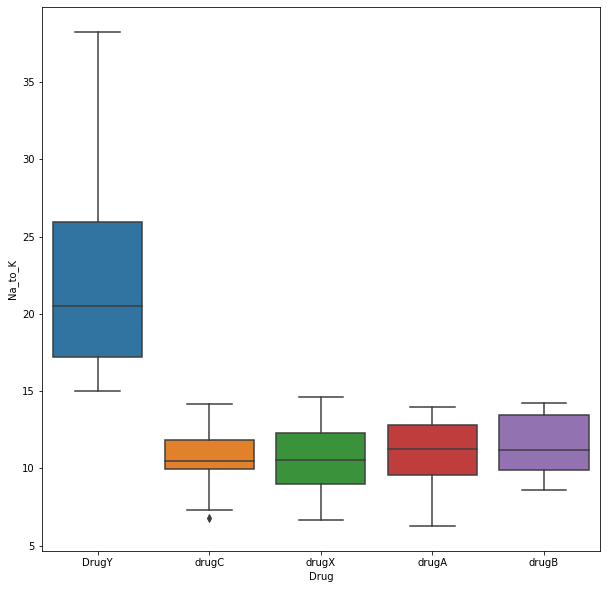

In [12]:
plt.figure(figsize=(10,10)) 
sns.boxplot(x='Drug',y='Na_to_K',data=df)

Text(0.5, 1.0, 'count of males and females')

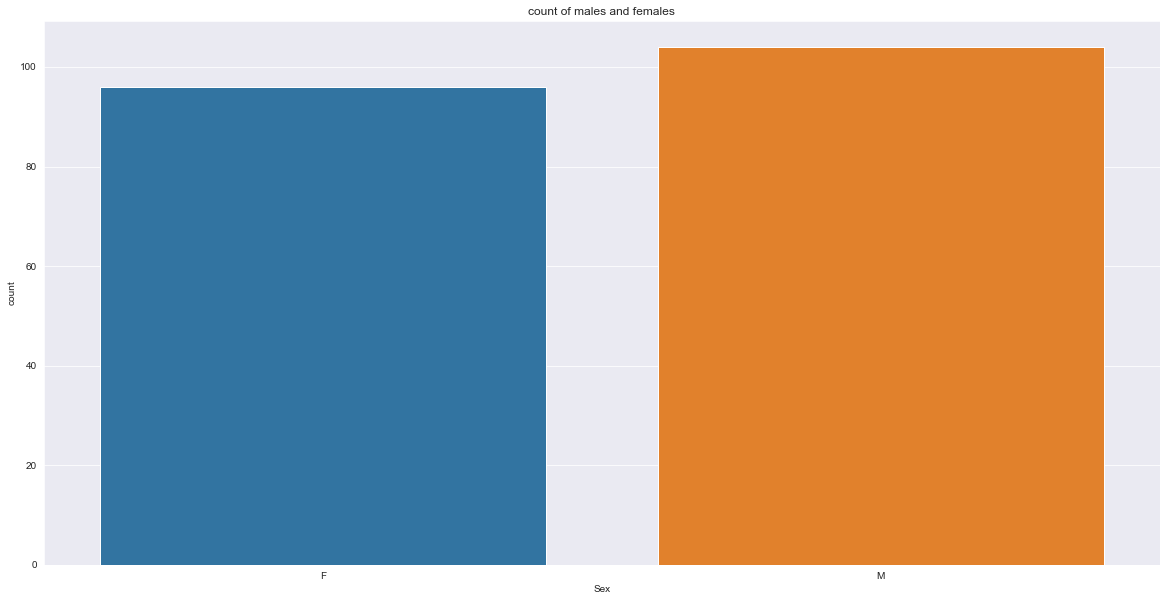

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Sex'])
plt.title('count of males and females')

Text(0.5, 1.0, 'count of bp')

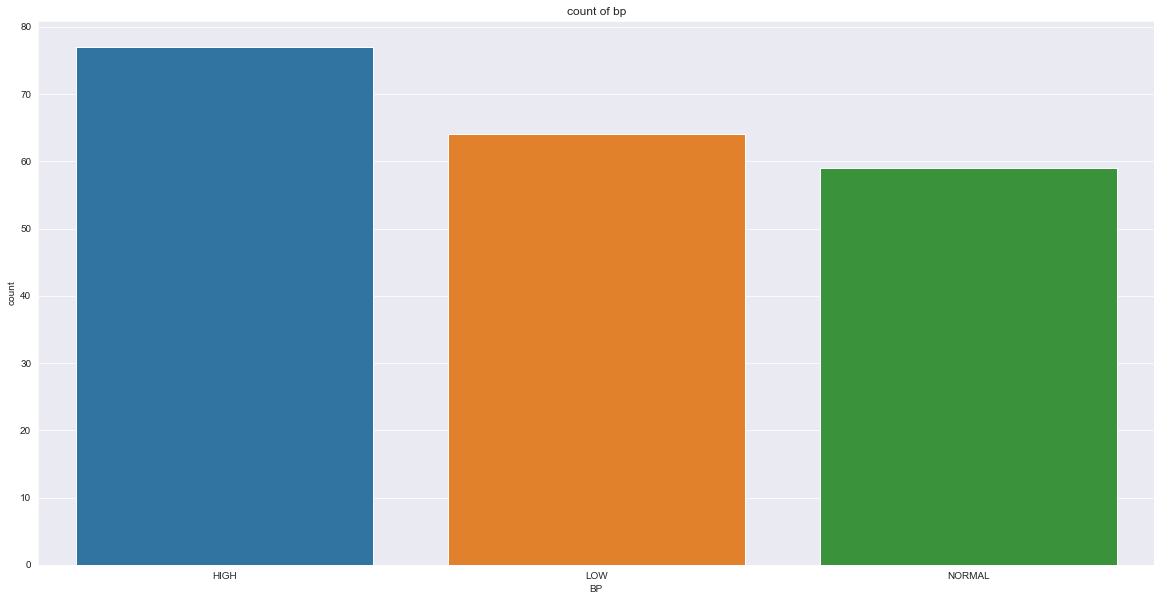

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['BP'])
plt.title('count of bp')

Text(0.5, 1.0, 'count of cholestrol')

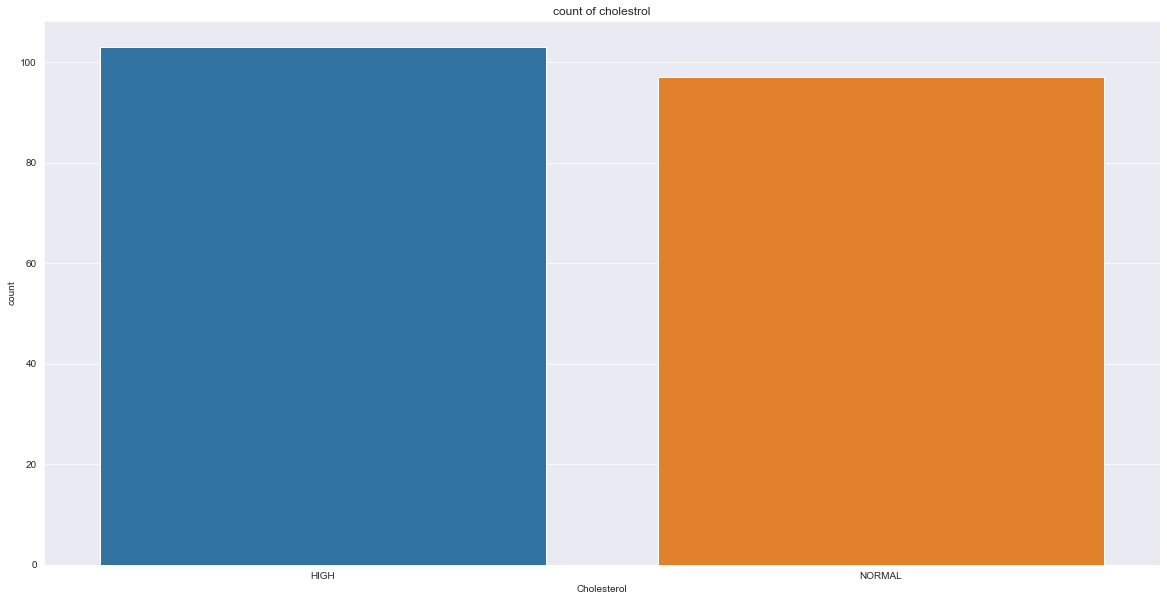

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Cholesterol'])
plt.title('count of cholestrol')

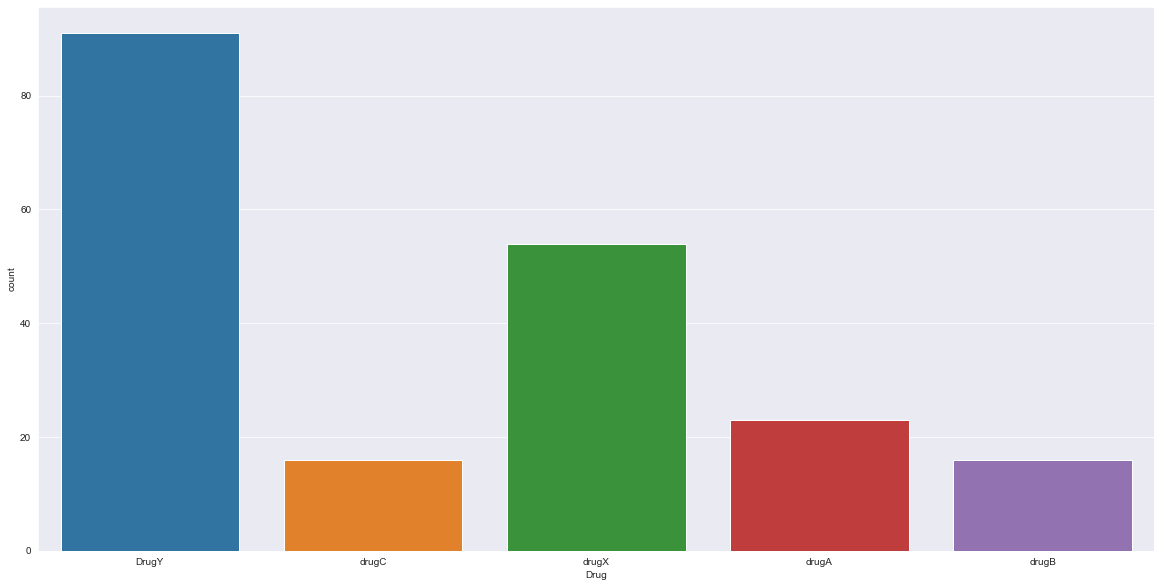

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Drug'])

### Swarm plot b/w Age and Drug (Taking BP as a hue )

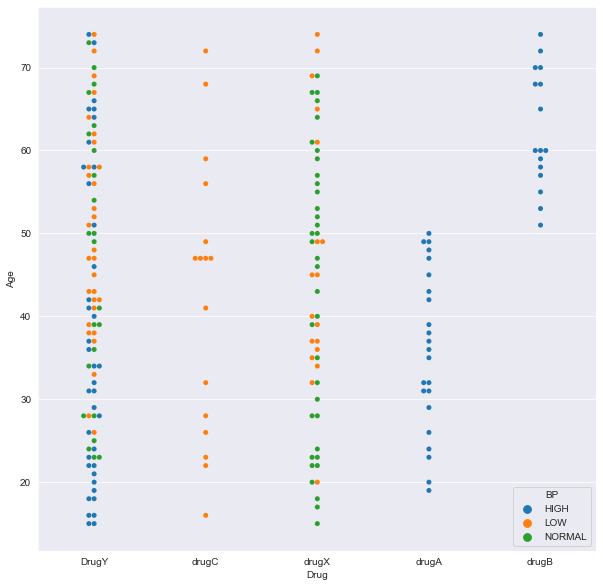

In [19]:
plt.figure(figsize=(10,10)) 
sns.swarmplot(x='Drug',y='Age',hue='BP',data=df)

### Swarm plot b/w Age and Drug (Taking Choleatrol as a hue)

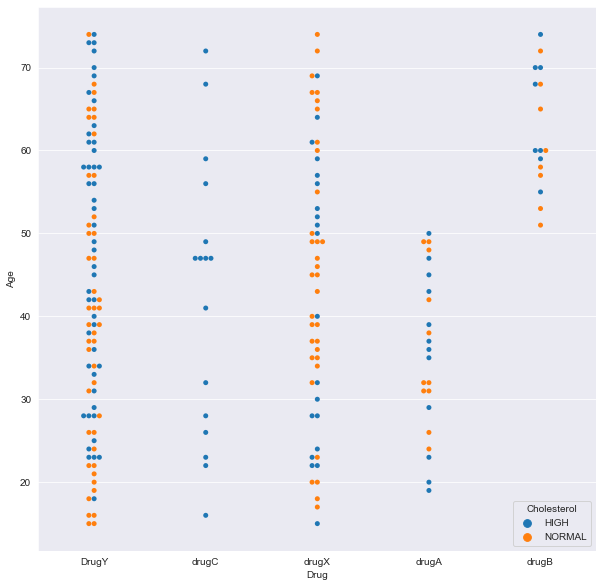

In [20]:
plt.figure(figsize=(10,10)) 
sns.swarmplot(x='Drug',y='Age',hue='Cholesterol',data=df)

### Swarm plot Na_to_k vs Drug(Taking hue as a BP)

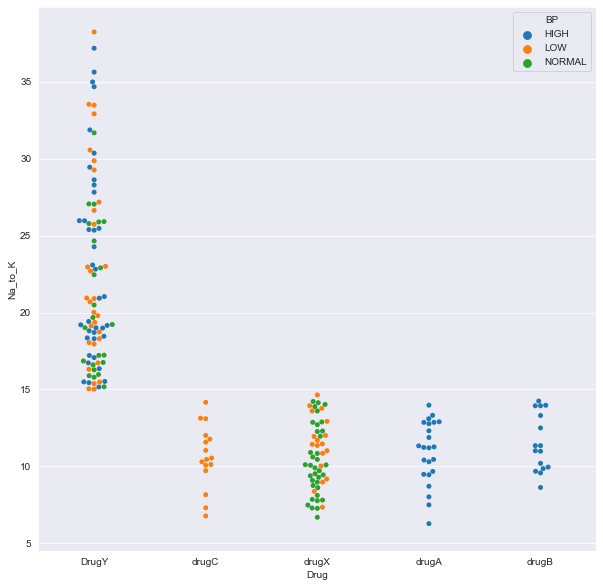

In [21]:
plt.figure(figsize=(10,10)) 
sns.swarmplot(x='Drug',y='Na_to_K',hue='BP',data=df)

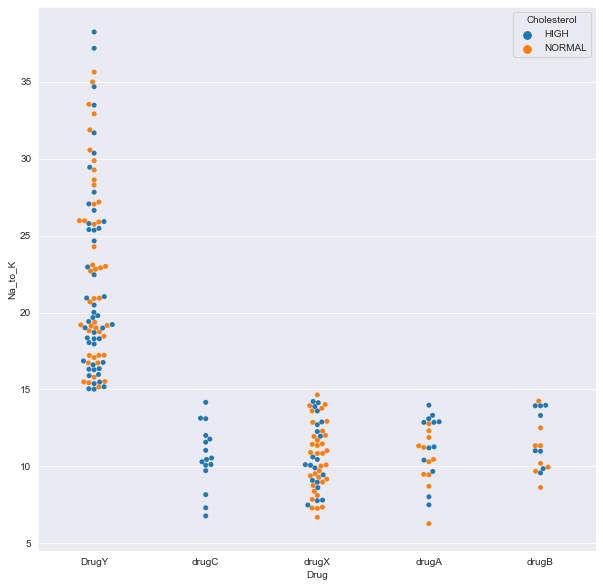

In [22]:
plt.figure(figsize=(10,10)) 
sns.swarmplot(x='Drug',y='Na_to_K',hue='Cholesterol',data=df)

### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(['Drug'],axis=1),df['Drug'],test_size=0.2)

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer=ColumnTransformer(transformers=[
    ('Transform1',OneHotEncoder(sparse=False,drop='first'),['Sex','BP','Cholesterol'])
],remainder='passthrough')

In [27]:
X_train=transformer.fit_transform(X_train)

In [28]:
X_test=transformer.transform(X_test)

### Models

In [29]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [31]:
svm=SVC()
svm.fit(X_train,Y_train)
result=svm.predict(X_test)
l=metrics.accuracy_score(Y_test,result)

In [32]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
result=knn.predict(X_test)
l=metrics.accuracy_score(Y_test,result)
l

0.65

In [33]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
result=rf.predict(X_test)
l=metrics.accuracy_score(Y_test,result)
l

1.0